In [4]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import dataset and useful labels

with open('./useful_labels.pkl','rb') as f:
    boundingBox = pickle.load(f)
    
df = pd.read_csv('./Dataset.csv')
df.head()

,file_name,xmin,ymin,xmax,ymax,label
0,hard_hat_workers2536,"[239, 102, 102]","[114, 67, 0]","[262, 148, 149]","[149, 121, 38]","['helmet', 'helmet', 'helmet']"
1,hard_hat_workers721,"[203, 223, 231, 251, 285, 304, 380, 370, 344]","[190, 196, 205, 184, 183, 164, 183, 210, 194]","[217, 237, 245, 265, 299, 324, 396, 382, 358]","[209, 214, 219, 204, 202, 188, 202, 225, 213]","['helmet', 'helmet', 'helmet', 'helmet', 'helm..."
2,hard_hat_workers3425,"[135, 226, 181, 134, 181]","[116, 172, 131, 0, 0]","[162, 251, 207, 162, 208]","[148, 204, 156, 23, 8]","['helmet', 'helmet', 'helmet', 'helmet', 'helm..."
3,hard_hat_workers3947,"[113, 142, 184, 223, 269, 306, 335, 134]","[148, 138, 158, 134, 161, 165, 157, 143]","[132, 166, 216, 267, 309, 325, 394, 145]","[174, 176, 198, 187, 210, 192, 226, 173]","['helmet', 'helmet', 'helmet', 'helmet', 'helm..."
4,hard_hat_workers1934,"[204, 334]","[70, 69]","[332, 414]","[211, 211]","['helmet', 'helmet']"


In [19]:
boundingBox['hard_hat_workers0.png']

{'dimension': [[357, 116, 47, 59],
  [4, 146, 27, 38],
  [253, 139, 22, 38],
  [300, 145, 23, 36],
  [116, 151, 22, 29],
  [80, 151, 20, 29],
  [62, 144, 21, 28],
  [322, 141, 23, 37],
  [175, 156, 19, 30],
  [222, 151, 18, 31],
  [200, 146, 16, 27],
  [98, 140, 14, 20],
  [157, 150, 18, 27]],
 'label': ['helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'helmet',
  'head',
  'head',
  'head',
  'head',
  'head',
  'helmet',
  'head']}

### Plot Some images

In [17]:
# Plot Single Image
path = '../Dataset - Safety Helment/'

def plotIamge(image):
    fig,ax = plt.subplots(figsize=(8,8))
    img = plt.imread(os.path.join(path,'images',image))
    ax.imshow(img)
    B = boundingBox[image]
    for bbx,label in zip(B['dimension'],B['label']):
        bbx[2] = abs(bbx[0]-bbx[2])
        bbx[3] = abs(bbx[1]-bbx[3])
        ax.add_patch(Rectangle((bbx[0],bbx[1]),bbx[2],bbx[3],fc ='none',ec ='black',lw = 2))
        ax.text(bbx[0]+5,bbx[1],label,bbox=dict(facecolor='red', alpha=0.5))
        ax.set_title(image,fontsize=15)
        
    plt.axis('off')
    plt.show()

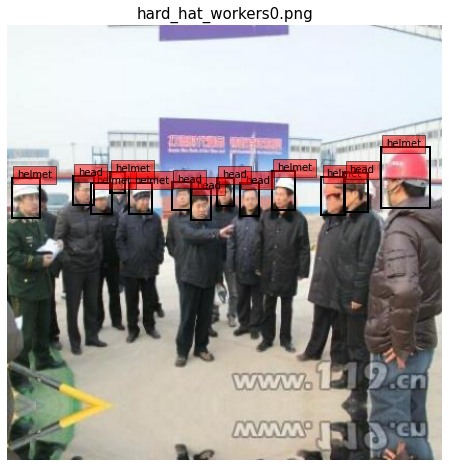

In [18]:
plotIamge('hard_hat_workers0.png')

In [15]:
# Plot Multple Images

from object_detection_fastai.helper.object_detection_helper import *

In [36]:
def get_bbox(image):
    
    labels = []
    
    image = image.split('/')[-1]
    label = boundingBox[image]
    bboxs = label['dimension']
    for i in range(len(bboxs)):
        bbox = bboxs[i]
        bboxs[i] = [bbox[1],bbox[0],bbox[3],bbox[2]]
    
    labels.append(bboxs)
    labels.append(label['label'])
    return labels

size = 512

# Prepare DataBunch
images = (ObjectItemList.from_df(df, path, cols='file_name', folder='images',suffix='.png')
          .split_by_rand_pct(0.1)
          .label_from_func(get_bbox)
          .transform(size=size,tfm_y=True)
          .databunch(bs=8, collate_fn=bb_pad_collate))

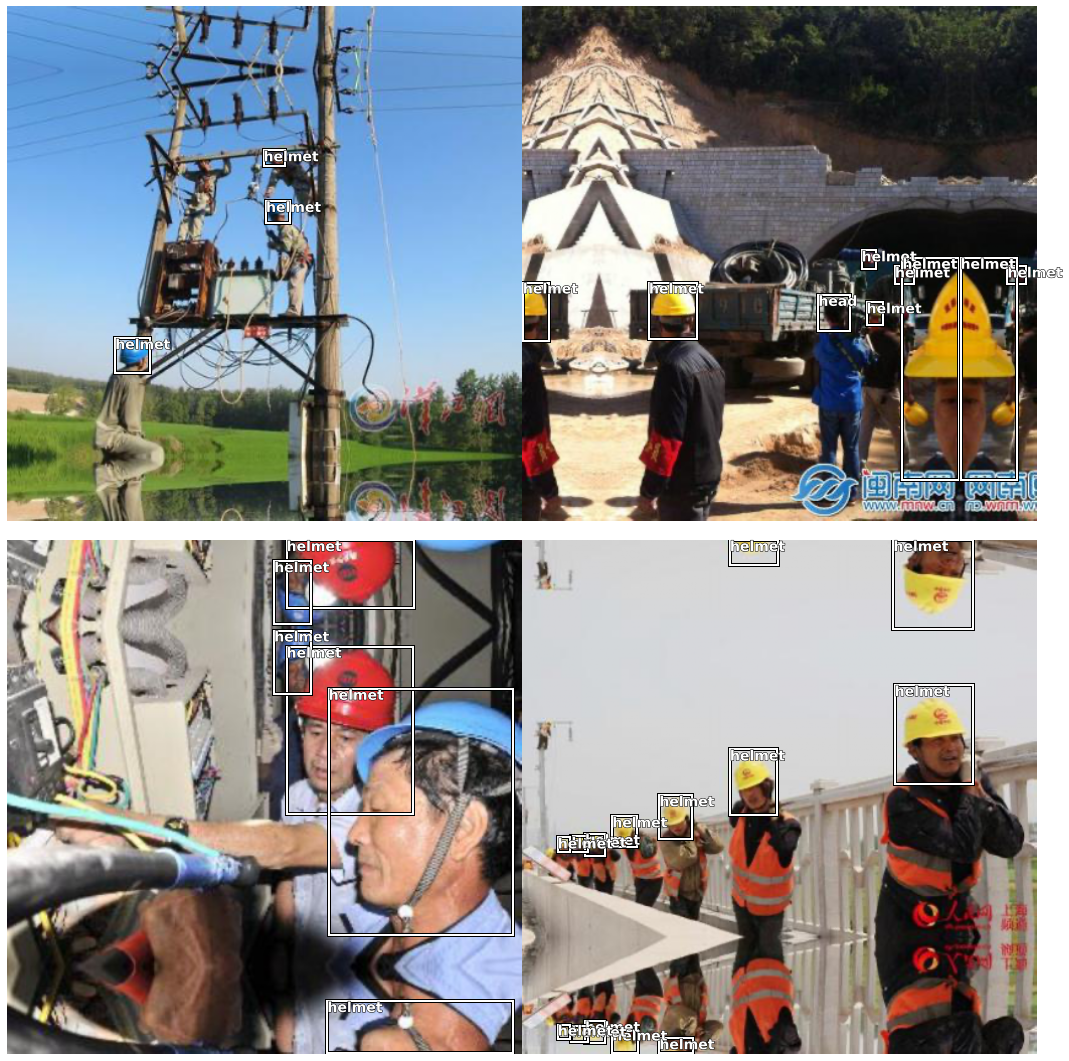

In [37]:
images.show_batch(rows=2,  figsize=(15,15))

In [38]:
len(images.train_ds),len(images.valid_ds),images.classes

(4500, 500, ['background', 'head', 'helmet'])